In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from numpy import exp, pi, sqrt
from scipy.special import gamma
from scipy.stats import chi2

def linear(x,a,b):
    return a*x+b
def gaussian(x, A, mu, sig): #A: Flaeche der Gaussfunktion
    return A/(sqrt(2*pi)*sig)*exp(-(x-mu)**2/2/sig**2)
def poisson(x, A_p, mu_p):
    return A_p*exp(-mu_p)*mu_p**x/gamma(x+1)

Steigung Plateaubereich (1 min): 0.00016666666666666666 1/Vs, Fehler 0.00028867513459481284 1/Vs, bzw.
   1.0 %, Fehler 2.449489742783178 % pro 100V
Steigung Plateaubereich (3 min): 5.555555555555556e-05 1/Vs, Fehler 9.622504486493762e-05 1/Vs, bzw.
   1.0 %, Fehler 2.449489742783178 % pro 100V


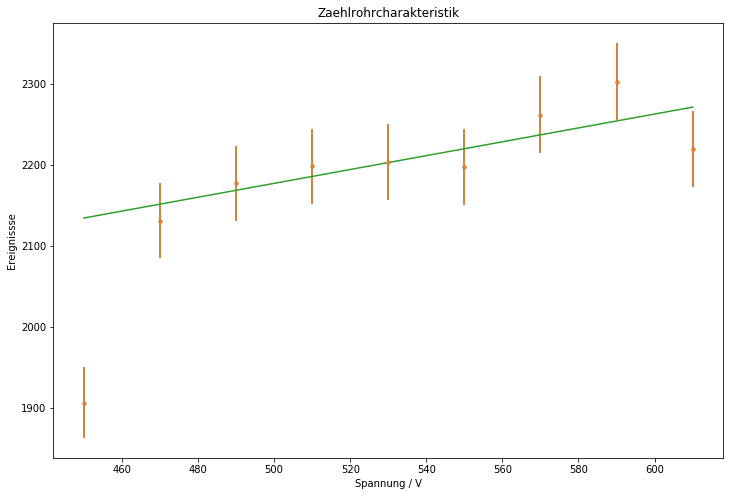

In [24]:
#Zaehlrohrspannung:
U=np.array([450,470,490,510,530,550,570,590,610])
#gezaehlte Ereignisse
N=np.array([1906,2131,2177,2198,2203,2197,2262,2303,2220])
Fehler_N=np.sqrt(N)

plt.figure(1, figsize=(12,8))
plt.errorbar(U, N, Fehler_N, fmt=".")
plt.xlabel('Spannung / V')
plt.ylabel('Ereignissse')
plt.title('Zaehlrohrcharakteristik')

popt, pcov=curve_fit(linear, U[1:], N[1:])
plt.errorbar(U, N, Fehler_N, fmt=".")
plt.xlabel('Spannung / V')
plt.ylabel('Ereignissse')
plt.title('Zaehlrohrcharakteristik')
plt.plot(U, linear(U,*popt))
#plt.savefig("figures/Zaehlrohrcharakteristik.pdf", format="pdf")

steig1=(2-1)/(100*60)
steig3=(2-1)/(100*180)
relst1=(2-1)/1
relst3=(2-1)/1
dsteig1=np.sqrt(2+1)/(100*60)
dsteig3=np.sqrt(2+1)/(100*180)
drelst1=(2/1)*np.sqrt((1/1)+(1/2))
drelst3=(2/1)*np.sqrt((1/1)+(1/2))
print("Steigung Plateaubereich (1 min): {} 1/Vs, Fehler {} 1/Vs, bzw.\n   {} %, Fehler {} % pro 100V"
      .format(steig1,dsteig1,relst1,drelst1))
print("Steigung Plateaubereich (3 min): {} 1/Vs, Fehler {} 1/Vs, bzw.\n   {} %, Fehler {} % pro 100V"
      .format(steig3,dsteig3,relst3,drelst3))

In [16]:
anzahl, haeufigkeit=np.loadtxt('data/Dateiname.dat', unpack=True)
fehler=np.sqrt(haeufigkeit)

plt.errorbar(anzahl, haeufigkeit, fehler, fmt=".")
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit / 1/s')
plt.ylabel('Haeufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')

popt, pcov=curve_fit(gaussian,anzahl[12:-12], haeufigkeit[12:-12],
p0=[2000,75,8],sigma=fehler[12:-12])
popt_p, pcov_p = curve_fit(poisson, anzahl[12:-12],
haeufigkeit[12:-12], p0=[2000, 75], sigma=fehler[12:-12])

plt.errorbar(anzahl,haeufigkeit,fehler, fmt=".",label='Messung')
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit 1/s')
plt.ylabel('Haeufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')
x=np.linspace(40,110, 100)
plt.plot(x, gaussian(x,*popt), label='Gauss')
plt.plot(x, poisson(x,*popt_p), label='Poisson',linestyle=':')
plt.legend()
plt.savefig("figures/poisson_vs_gaussian.pdf", format="pdf")

print("Gaussfit:")
print("A=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0]))
print("mu=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1]))
print("sig=",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2]))
print("Poissonfit:")
print("A_p=",popt_p[0], ", Standardfehler=", sqrt(pcov_p[0][0]))
print("mu_p=",popt_p[1], ", Standardfehler=", sqrt(pcov_p[1][1]))

#Gauss:
chi2_g=np.sum((gaussian(anzahl[12:-12],*popt)
-haeufigkeit[12:-12])**2/fehler[12:-12]**2)
dof_g=len(anzahl[12:-12])-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g=chi2_g/dof_g
print("chi2_g=", chi2_g)
print("chi2_red_g=",chi2_red_g)
#Poisson:
chi2_p=np.sum((poisson(anzahl[12:-12],*popt_p)
-haeufigkeit[12:-12])**2/fehler[12:-12]**2)
dof_p=len(anzahl[12:-12])-2 #poisson hat nur 2 Parameter
chi2_red_p=chi2_p/dof_p
print("chi2_p=", chi2_p)
print("chi2_red_p=",chi2_red_p)

#Gauss:
prob_g=round(1-chi2.cdf(chi2_g,dof_g),2)*100
#Poisson:
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2)*100
print("Wahrscheinlichkeit Gauss=", prob_g,"%")
print("Wahrscheinlichkeit Poisson=", prob_p,"%")

OSError: data/Dateiname.dat not found.

In [18]:
anzahl2, haeufigkeit2=np.loadtxt('data/Dateiname.dat', unpack=True)
fehler2=np.sqrt(haeufigkeit2)

plt.errorbar(anzahl2, haeufigkeit2, fehler2, fmt=".")
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit / 1/s')
plt.ylabel('Haeufigkeit')
plt.title('Statistik des radioaktiven Zerfalls bei kleinen Raten')

popt2, pcov2=curve_fit(gaussian,anzahl2[12:-12], haeufigkeit2[12:-12],
                       p0=[2000,75,8],sigma=fehler2[12:-12])
popt_p2, pcov_p2 = curve_fit(poisson2, anzahl2[12:-12],
                       haeufigkeit2[12:-12], p0=[2000, 75], sigma=fehler[12:-12])

plt.errorbar(anzahl2,haeufigkeit2,fehler2, fmt=".",label='Messung')
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit 1/s')
plt.ylabel('Haeufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')
x=np.linspace(40,110, 100)
plt.plot(x, gaussian(x,*popt2), label='Gauss')
plt.plot(x, poisson(x,*popt_p2), label='Poisson',linestyle=':')
plt.legend()
plt.savefig("figures/poisson_vs_gaussian_low_rates.pdf", format="pdf")

print("Gaussfit:")
print("A=",popt2[0], ", Standardfehler=", np.sqrt(pcov2[0][0]))
print("mu=",popt2[1], ", Standardfehler=", np.sqrt(pcov2[1][1]))
print("sig=",popt2[2], ", Standardfehler=", np.sqrt(pcov2[2][2]))
print("Poissonfit:")
print("A_p=",popt_p2[0], ", Standardfehler=", sqrt(pcov_p2[0][0]))
print("mu_p=",popt_p2[1], ", Standardfehler=", sqrt(pcov_p2[1][1]))

#Gauss:
chi2_g2=np.sum((gaussian(anzahl2[12:-12],*popt2)-
                haeufigkeit2[12:-12])**2/fehler2[12:-12]**2)
dof_g2=len(anzahl2[12:-12])-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g2=chi2_g2/dof_g2
print("chi2_g=", chi2_g2)
print("chi2_red_g=",chi2_red_g2)
#Poisson:
chi2_p2=np.sum((poisson(anzahl2[12:-12],*popt_p2)-
                haeufigkeit2[12:-12])**2/fehler2[12:-12]**2)
dof_p2=len(anzahl2[12:-12])-2 #poisson hat nur 2 Parameter
chi2_red_p2=chi2_p2/dof_p2
print("chi2_p=", chi2_p2)
print("chi2_red_p=",chi2_red_p2)

#Gauss:
prob_g2=round(1-chi2.cdf(chi2_g2,dof_g2),2)*100
#Poisson:
prob_p2=round(1-chi2.cdf(chi2_p2,dof_p2),2)*100
print("Wahrscheinlichkeit Gauss=", prob_g2,"%")
print("Wahrscheinlichkeit Poisson=", prob_p2,"%")

OSError: data/Dateiname.dat not found.